# State-Value Function

How does an agent decide what to do? How does an agent know how good her actions have been and evaluate her current situation in the environment? How does she decide what action to take?

The State-Value Function returns the expected value given each state. Thus, the State-Value Function enables an agent to evaluate its current, temporary situation.

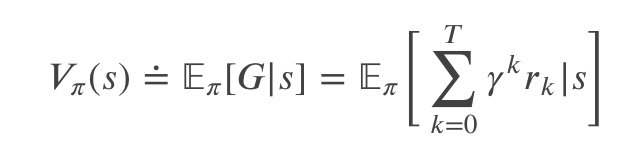

In [19]:
from IPython.display import Image
Image("./figs/state_value_fn.png")

The State-Value function represents the value for an Agent to be in a given state. The function describes the expected return $G_t$ w.r.t a given state.

In [5]:
# Grid World

starting_position = 1
cliff_position = 0
end_position = 5
reward_goal_state = 5
reward_cliff = 0

def reward(current_position) -> int:
    if current_position <= cliff_position:
        return reward_cliff

    if current_position >= end_position >= end_position:
        return reward_goal_state

    return 0

def is_termination(current_position) -> bool:
    if current_position <= cliff_position:
        return True

    if current_position >= end_position:
        return True

    return False

In [8]:
# Agent (Strategy, Policy)
import numpy as np

# Chance Strategy
def strategy() -> int:
    if np.random.random() >= 0.5:
        # Move Right [0-5]
        return 1
    else:
        # Move Left [0-5]
        return -1

In [14]:
# Run Experiment

np.random.seed(42)

# Global Buffers
# Cumulative Value (Sum(
value_sum = np.zeros(end_position + 1)
n_hits = np.zeros(end_position + 1)

# Epoch == Episode

n_iter = 20
for i in range(n_iter):
    position_history = []
    current_position = starting_position

    # Episode (Loop until Termination State == True)
    while True:
        # Append Position to Log
        position_history.append(current_position)

        if is_termination(current_position):
            break

        # Increment Strategy by and Action; Update position
        current_position += strategy()

    # Log Reward
    current_reward = reward(current_position)

    # Add Reward to Global Buffers; Log - To compute the average at the next Step
    for pos in position_history:
        value_sum[pos] += current_reward
        n_hits += 1

    # Compute Average Value | Expectation
    # expected_return = ','.join(f"{q:.2f}" for q in value_sum / n_hits)
    # print("[{}] Average Reward: [{}]".format(i, expected_return))

    expected_return = ', '.join(f'{q:.2f}' for q in value_sum / n_hits)
    print("[{}] Average reward: [{}]".format(i, expected_return))


[0] Average reward: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
[1] Average reward: [0.00, 0.67, 1.00, 1.33, 1.00, 0.33]
[2] Average reward: [0.00, 0.59, 0.88, 1.18, 0.88, 0.29]
[3] Average reward: [0.00, 0.53, 0.79, 1.05, 0.79, 0.26]
[4] Average reward: [0.00, 0.48, 0.71, 0.95, 0.71, 0.24]
[5] Average reward: [0.00, 0.43, 0.65, 0.87, 0.65, 0.22]
[6] Average reward: [0.00, 0.37, 0.56, 0.74, 0.56, 0.19]
[7] Average reward: [0.00, 0.32, 0.48, 0.65, 0.48, 0.16]
[8] Average reward: [0.00, 0.30, 0.45, 0.61, 0.45, 0.15]
[9] Average reward: [0.00, 0.29, 0.43, 0.57, 0.43, 0.14]
[10] Average reward: [0.00, 0.19, 0.28, 0.38, 0.28, 0.09]
[11] Average reward: [0.00, 0.18, 0.27, 0.36, 0.27, 0.09]
[12] Average reward: [0.00, 0.38, 0.53, 0.45, 0.30, 0.15]
[13] Average reward: [0.00, 0.34, 0.47, 0.41, 0.27, 0.14]
[14] Average reward: [0.00, 0.33, 0.46, 0.39, 0.26, 0.13]
[15] Average reward: [0.00, 0.32, 0.45, 0.38, 0.26, 0.13]
[16] Average reward: [0.00, 0.30, 0.43, 0.37, 0.24, 0.12]
[17] Average reward: [0.

In [18]:
import numpy as np
np.random.seed(42)

# Global buffers to perform averaging later
value_sum = np.zeros(end_position + 1)
n_hits = np.zeros(end_position + 1)

n_iter = 10000
for i in range(n_iter):
    position_history = [] # A log of positions in this episode
    current_position = starting_position # Reset
    while True:
        # Append position to log
        position_history.append(current_position)

        if is_termination(current_position):
            break

        # Update current position according to strategy
        current_position += strategy()

    # Now the episode has finished, what was the reward?
    current_reward = reward(current_position)

    # Now add the reward to the buffers that allow you to calculate the average
    for pos in position_history:
        value_sum[pos] += current_reward
        n_hits[pos] += 1

    # Now calculate the average for this episode and print
    expected_return = ', '.join(f'{q:.2f}' for q in value_sum / n_hits)
    print("[{}] Average reward: [{}]".format(i, expected_return))

/var/folders/gy/t2nchkdj6dv_9vl5kcnbp7wr0000gp/T/ipykernel_7760/1835467715.py:31: RuntimeWarning: invalid value encountered in true_divide
  expected_return = ', '.join(f'{q:.2f}' for q in value_sum / n_hits)


[0] Average reward: [0.00, 0.00, nan, nan, nan, nan]
[1] Average reward: [0.00, 3.33, 5.00, 5.00, 5.00, 5.00]
[2] Average reward: [0.00, 2.50, 5.00, 5.00, 5.00, 5.00]
[3] Average reward: [0.00, 2.00, 5.00, 5.00, 5.00, 5.00]
[4] Average reward: [0.00, 1.67, 5.00, 5.00, 5.00, 5.00]
[5] Average reward: [0.00, 1.43, 5.00, 5.00, 5.00, 5.00]
[6] Average reward: [0.00, 1.11, 3.75, 5.00, 5.00, 5.00]
[7] Average reward: [0.00, 0.91, 3.00, 5.00, 5.00, 5.00]
[8] Average reward: [0.00, 0.83, 3.00, 5.00, 5.00, 5.00]
[9] Average reward: [0.00, 0.77, 3.00, 5.00, 5.00, 5.00]
[10] Average reward: [0.00, 0.59, 1.25, 2.22, 3.75, 5.00]
[11] Average reward: [0.00, 0.56, 1.25, 2.22, 3.75, 5.00]
[12] Average reward: [0.00, 1.19, 2.19, 2.73, 4.00, 5.00]
[13] Average reward: [0.00, 1.09, 1.94, 2.31, 3.33, 5.00]
[14] Average reward: [0.00, 1.04, 1.94, 2.31, 3.33, 5.00]
[15] Average reward: [0.00, 1.00, 1.94, 2.31, 3.33, 5.00]
[16] Average reward: [0.00, 0.93, 1.84, 2.31, 3.33, 5.00]
[17] Average reward: [0.00, 